# Pandas によるcsvファイルの読み込み
1. sectorとそのセクタのactivation-flagが書かれた2カラムのcsvファイルを読み込む
2. 2カラム目をアクティブフラグとする
3. アクティブなセクタのみ表示する
4. 楽天証券で取り扱っている米国株銘柄のcsvファイルを読み込む
5. 自分が取り扱いたいセクタの銘柄を表示する

# Pandas-readerによる株価の取り込み
1. Pandas-readerのインストール
2. Anacondaプロンプトで、```pip install pandas_datareader```
3. Warningが出たら、[こちら](https://github.com/pydata/pandas-datareader/issues/775)を参照すること!

## CSVファイルの読み込みとlist化
### 自分が取引したいセクタの選別
```selectedSectors``` に格納される

In [2]:
#%%
import datetime
import pandas_datareader.data as pdr
import pandas as pd
df = pd.read_csv('~/OneDrive/code/python/Finance/Algs2/sector_handling.csv', encoding="UTF-8")

sector = df['sector']
handling = df['handling']

sectors = list(sector)
handlings = list(handling)

allSectorFluctuations = []

In [3]:
#%% selectedSectorsに格納
selectedSectors = []
numOfHandling = len(handlings)
for i in range(numOfHandling):
    if handlings[i] == 1:
        selectedSectors.append(sector[i])


### 選択されたセクタの表示

In [4]:
#%%
print (selectedSectors)

['半導体関連', 'コンピュータ関連', '情報処理サービス', 'ソフトウェア・ソフトウェアサービス', 'ネットワーク・ネットワークセキュリティ', 'インターネットサービス', '通信関連', '自動車・自動車関連', '医療機器']


## 取り扱い全銘柄ファイルから選択されたセクタに紐付いたtikcer(brand)
```ss``` に抽出したいsectorの番号を代入する。sectorの添字については、上記参照

In [5]:
#%%
ss = 1
dataFrame = pd.read_csv('~/OneDrive/code/python/Finance/Algs2/20200630_Result_us.csv', encoding="UTF-8")
lis_allTikcers = list(dataFrame['ticker'])
lis_allSectors = list(dataFrame['sector'])
lis_allBrandE = list(dataFrame['brand_e'])
lis_allMarket = list(dataFrame['market'])
lis_allHandling = list(dataFrame['handling'])
numOfBrand = len(lis_allBrandE)
for i in range(numOfBrand):
    if lis_allSectors[i] == selectedSectors[ss]:
        print(lis_allTikcers[i])

AAPL
BB
CNXN
DELL
GME
HMI
HPQ
IBM
JKHY
LOGI
MDP
MRAM
MRCY
NCR
OLED
SCSC
SSYS
STX
SWCH
VJET
WB
WDC


## Tickerと期間を決めて、終値を取得する
データの取得期間を確認する

[68.97000122 67.61000061 76.08999634]


<AxesSubplot:xlabel='Date'>

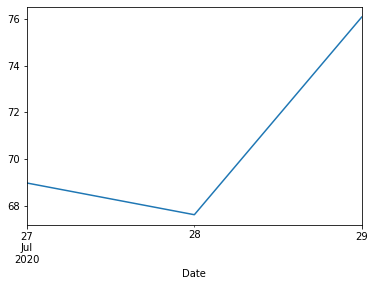

In [6]:
#%%
start_date = datetime.datetime(2020,7,27)
end_date = datetime.datetime(2020,7,29)
#tsd = pdr.DataReader("usmv","yahoo","1980/1/1").fillna(-1)#jpy
tsd = pdr.DataReader("AMD","yahoo",start_date, end_date).fillna(-1)#jpy
print(tsd.loc[:,'Adj Close'].values)
tsd.loc[:,'Adj Close'].plot()

## 選択したセクタの銘柄の直近3日の終値をすべて表示する

In [7]:

ss=1
numOfBrand = len(lis_allBrandE)
for i in range(numOfBrand):
    try:
        if lis_allSectors[i] == selectedSectors[ss]:
            tsd = pdr.DataReader(lis_allTikcers[i],"yahoo",start_date, end_date).fillna(-1)#jpy
            print(lis_allTikcers[i], end=' ')
            print(tsd.loc[:,'Adj Close'].values)
    except KeyError:
            print(lis_allTikcers[i], end=' ')
            print ("KeyError")


AAPL [94.47636414 92.92435455 94.70555878]
BB [4.69000006 4.65999985 4.86999989]
CNXN [42.02355576 41.62607193 43.28555298]
DELL [60.95999908 59.36999893 59.68999863]
GME [4.01000023 3.94000006 4.05999994]
HMI [13.39000034 13.10000038 13.52000046]
HPQ [17.50242233 16.41159439 16.78503036]
IBM [122.79819489 121.10523987 121.93225861]
JKHY [179.74203491 175.6040802  179.79176331]
LOGI [70.47496796 68.93431091 70.42558289]
MDP [14.05000019 14.30000019 14.61999989]
MRAM [7.32999992 7.23999977 7.48999977]
MRCY [76.47000122 75.47000122 77.12000275]
NCR [17.56999969 16.71999931 19.04999924]
OLED [170.14804077 164.20718384 168.17108154]
SCSC [22.80999947 22.32999992 23.06999969]
SSYS [15.59000015 15.30000019 15.07999992]
STX [48.40802765 47.4219017  43.26259995]
SWCH [17.54037285 17.39130592 17.65962791]
VJET [8.19999981 8.10000038 7.75      ]
WB [33.11000061 34.09000015 34.43999863]
WDC [43.72999954 42.84999847 42.41999817]


## セクター別騰落率の計算
直近２日の終値を使って、セクター別登録率を計算する。セクターの騰落率は銘柄の騰落率の単純平均

### プログラムの説明
現在、選択しているセクタ数(0-8:'半導体関連', 'コンピュータ関連', '情報処理サービス', 'ソフトウェア・ソフトウェアサービス', 'ネットワーク・ネットワークセキュリティ', 'インターネットサービス', '通信関連', '自動車・自動車関連', '医療機器')を対応させるためにssに代入させる。ssに代入させる数値は0-8で、これは上記のリストの添字と連動している。<br>
それぞれのTickerをkeyとした辞書を作成し、そこに騰落率を格納する。

In [8]:

ss = 1
tickerStart = 0
numOfBrand = len(lis_allBrandE)
print (numOfBrand)
fluctuations = 0
sectorFluctuations = 0
dicMaxFluctuations = {}

#for i in range(tickerStart, numOfBrand):
for i in range(numOfBrand):
    try:
        if lis_allSectors[i] == selectedSectors[ss]:
            tsd = pdr.DataReader(lis_allTikcers[i],"yahoo",start_date, end_date).fillna(-1)#jpy
            fluctuations = (tsd.loc[:,'Adj Close'].values[2]-tsd.loc[:,'Adj Close'].values[1]) / tsd.loc[:,'Adj Close'].values[1]
            sectorFluctuations = sectorFluctuations + fluctuations
            dicMaxFluctuations[lis_allTikcers[i]]=fluctuations
            print('%04d' % i, end = ' ')
            print(lis_allTikcers[i], end=' ')
            print(tsd.loc[:,'Adj Close'].values, end=' ')
            print(fluctuations)

    except KeyError:
            print(lis_allTikcers[i], end=' ')
            print ("KeyError")


sectorFluctuations = sectorFluctuations / numOfBrand
allSectorFluctuations.append(sectorFluctuations)
print("")
print("Sector fluctuations = ", end='')
print(sectorFluctuations)

2938
0007 AAPL [94.47636414 92.92435455 94.70555878] 0.019168324947714577
0287 BB [4.69000006 4.65999985 4.86999989] 0.045064387344045595
0575 CNXN [42.02355576 41.62607193 43.28555298] 0.039866385936615796
0712 DELL [60.95999908 59.36999893 59.68999863] 0.005389922529581895
1105 GME [4.01000023 3.94000006 4.05999994] 0.030456823303636707
1217 HMI [13.39000034 13.10000038 13.52000046] 0.032061073592642465
1237 HPQ [17.50242233 16.41159439 16.78503036] 0.022754399434150103
1290 IBM [122.79819489 121.10523987 121.93225861] 0.00682892613641876
1420 JKHY [179.74203491 175.6040802  179.79176331] 0.023847299565560393
1571 LOGI [70.47496796 68.93431091 70.42558289] 0.02163323246295277
1637 MDP [14.05000019 14.30000019 14.61999989] 0.022377600738183925
1715 MRAM [7.32999992 7.23999977 7.48999977] 0.034530387831958366
1717 MRCY [76.47000122 75.47000122 77.12000275] 0.021863011782041333
1782 NCR [17.56999969 16.71999931 19.04999924] 0.13935406814550835
1906 OLED [170.14804077 164.20718384 168.17

In [9]:
print(allSectorFluctuations)

[0.00013370920222824668]


## Tickerをkeyにして、騰落率を求める。
予め、当該セクタで```dicMaxFluctuations```を求めておくこと。

In [10]:
print (dicMaxFluctuations['AAPL'])

0.019168324947714577


In [11]:
print (dicMaxFluctuations)

{'AAPL': 0.019168324947714577, 'BB': 0.045064387344045595, 'CNXN': 0.039866385936615796, 'DELL': 0.005389922529581895, 'GME': 0.030456823303636707, 'HMI': 0.032061073592642465, 'HPQ': 0.022754399434150103, 'IBM': 0.00682892613641876, 'JKHY': 0.023847299565560393, 'LOGI': 0.02163323246295277, 'MDP': 0.022377600738183925, 'MRAM': 0.034530387831958366, 'MRCY': 0.021863011782041333, 'NCR': 0.13935406814550835, 'OLED': 0.024139611997678386, 'SCSC': 0.033139264381840096, 'SSYS': -0.01437910224092892, 'STX': -0.08770845555440523, 'SWCH': 0.015428513082782038, 'VJET': -0.04320992160326538, 'WB': 0.010266895645482247, 'WDC': -0.010035013313605517}


## 騰落率の最大値を求める
Tickerをkeyとした辞書から、最大値を求める。key(=Ticker)を逆検索する。

In [12]:
vv = max(dicMaxFluctuations.values())
keys = [k for k, v in dicMaxFluctuations.items() if v == vv]
print (keys, end=' ')
print (vv)

['NCR'] 0.13935406814550835


## 企業研究
騰落率をソーティングして、Best 5, Worst 5を求め、URLを生成して各企業の細かい情報を入手する。
### ソーティング結果(list)から先頭と末尾の要素を5個求める
URLにはyahoo.co.jp, yahoo.comのファイナンスの情報を活用する。それぞれの末尾にTickerを付加してURLを生成する。

In [13]:
dicMaxFluctuations_sorted = sorted(dicMaxFluctuations.items(), key=lambda x:x[1])
print (dicMaxFluctuations_sorted)

[('STX', -0.08770845555440523), ('VJET', -0.04320992160326538), ('SSYS', -0.01437910224092892), ('WDC', -0.010035013313605517), ('DELL', 0.005389922529581895), ('IBM', 0.00682892613641876), ('WB', 0.010266895645482247), ('SWCH', 0.015428513082782038), ('AAPL', 0.019168324947714577), ('LOGI', 0.02163323246295277), ('MRCY', 0.021863011782041333), ('MDP', 0.022377600738183925), ('HPQ', 0.022754399434150103), ('JKHY', 0.023847299565560393), ('OLED', 0.024139611997678386), ('GME', 0.030456823303636707), ('HMI', 0.032061073592642465), ('SCSC', 0.033139264381840096), ('MRAM', 0.034530387831958366), ('CNXN', 0.039866385936615796), ('BB', 0.045064387344045595), ('NCR', 0.13935406814550835)]


In [14]:
URL_J = 'https://stocks.finance.yahoo.co.jp/us/detail/'
URL_E = 'https://finance.yahoo.com/quote/'

print ("Best5:")
for i in range(5):
    i = (i + 1) * -1
    print (URL_J + dicMaxFluctuations_sorted[i][0])

print ("")
    
print ("Worst5:")
for i in range(5):
    print (URL_J + dicMaxFluctuations_sorted[i][0])

Best5:
https://stocks.finance.yahoo.co.jp/us/detail/NCR
https://stocks.finance.yahoo.co.jp/us/detail/BB
https://stocks.finance.yahoo.co.jp/us/detail/CNXN
https://stocks.finance.yahoo.co.jp/us/detail/MRAM
https://stocks.finance.yahoo.co.jp/us/detail/SCSC

Worst5:
https://stocks.finance.yahoo.co.jp/us/detail/STX
https://stocks.finance.yahoo.co.jp/us/detail/VJET
https://stocks.finance.yahoo.co.jp/us/detail/SSYS
https://stocks.finance.yahoo.co.jp/us/detail/WDC
https://stocks.finance.yahoo.co.jp/us/detail/DELL


## S&P500 の検討(名寄せ)
S&P の構成銘柄のダウンロード先:[S&P 500 Companies with Financial Information](https://datahub.io/core/s-and-p-500-companies)<br>

1. ダウンロード後、header部分をリネームする
* Symbol => Ticker
* Name => brand_e
* Sector => sector (小文字)

2. Tickerをkeyにして、自分の分野のセクターに紐付ける<br>
S&P 500の銘柄(index)の変化に注意する

In [34]:

#ss = 1
numOfBrand = len(lis_allBrandE)
tickerStart = 0

for ss in range(len(selectedSectors)):
    fluctuations = 0
    sectorFluctuations = 0
    dicMaxFluctuations = {}
    print(ss, end=' ')
    print(selectedSectors[ss])
    for i in range(tickerStart, numOfBrand):
        try:
            if lis_allSectors[i] == selectedSectors[ss]:
                if lis_allHandling[i] == 1:
                    tsd = pdr.DataReader(lis_allTikcers[i],"yahoo",start_date, end_date).fillna(-1)#jpy
                    fluctuations = (tsd.loc[:,'Adj Close'].values[2]-tsd.loc[:,'Adj Close'].values[1]) / tsd.loc[:,'Adj Close'].values[1]
                    sectorFluctuations = sectorFluctuations + fluctuations
                    dicMaxFluctuations[lis_allTikcers[i]]=fluctuations
                    print('%04d' % i, end = ' ')
                    print(lis_allTikcers[i], end=' ')
                    print(tsd.loc[:,'Adj Close'].values, end=' ')
                    print(fluctuations)

        except KeyError:
                print(lis_allTikcers[i], end=' ')
                print ("KeyError")


    sectorFluctuations = sectorFluctuations / numOfBrand
    allSectorFluctuations.append(sectorFluctuations)
    print("Sector fluctuations = ", end='')
    print(sectorFluctuations)
    print("")



0 半導体関連
Sector fluctuations = 0.0

1 コンピュータ関連
Sector fluctuations = 0.0

2 情報処理サービス
Sector fluctuations = 0.0

3 ソフトウェア・ソフトウェアサービス
Sector fluctuations = 0.0

4 ネットワーク・ネットワークセキュリティ
Sector fluctuations = 0.0

5 インターネットサービス
Sector fluctuations = 0.0

6 通信関連
Sector fluctuations = 0.0

7 自動車・自動車関連
Sector fluctuations = 0.0

8 医療機器
Sector fluctuations = 0.0

